In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv('hotel_bookings.csv')

# EDA part

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


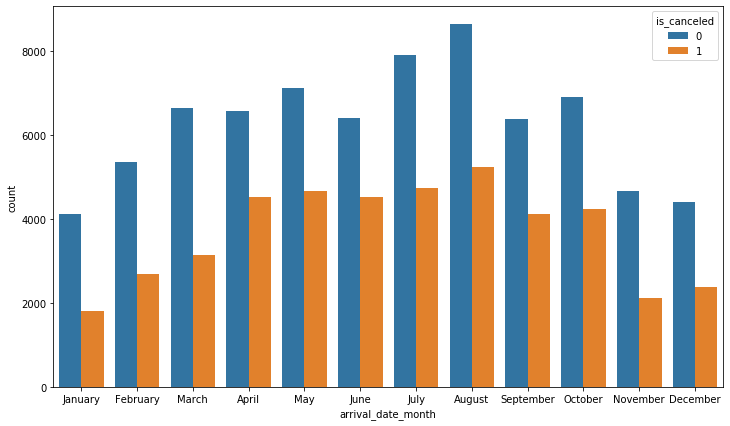

In [7]:
#check the number of booking during the month
order = ('January','February','March','April','May','June','July','August','September','October','November','December')
plt.figure(figsize=(12,7))
sns.countplot(x='arrival_date_month',data=df,order = order,hue='is_canceled')

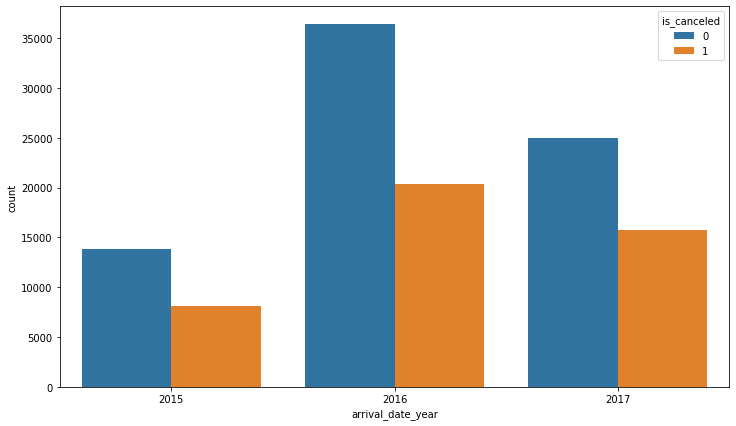

In [8]:
#check the number of booking during the year
plt.figure(figsize=(12,7))
sns.countplot(x='arrival_date_year',data=df,hue='is_canceled')

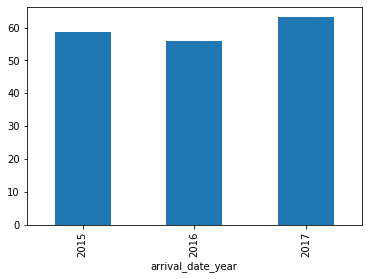

In [14]:
#calculate the number of cancellation and no cancel in each year
can0=df[df['is_canceled']==0].groupby('arrival_date_year').count()['is_canceled']
can1=df[df['is_canceled']==1].groupby('arrival_date_year').count()['is_canceled']

#check the percentage of cancellation in each year
can_year = can1/can0*100

can_year.plot(kind='bar')

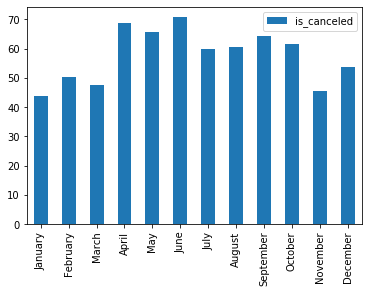

In [24]:
#calculate the number of cancellation and no cancel in each month
can2=df[df['is_canceled']==0].groupby('arrival_date_month').count()['is_canceled']
can3=df[df['is_canceled']==1].groupby('arrival_date_month').count()['is_canceled']

#check the percentage of cancellation in each year
can_month = can3/can2*100

#reset the order of the month
can_month = pd.DataFrame(can_month,index=order)

#plot the percentage
can_month.plot(kind='bar')

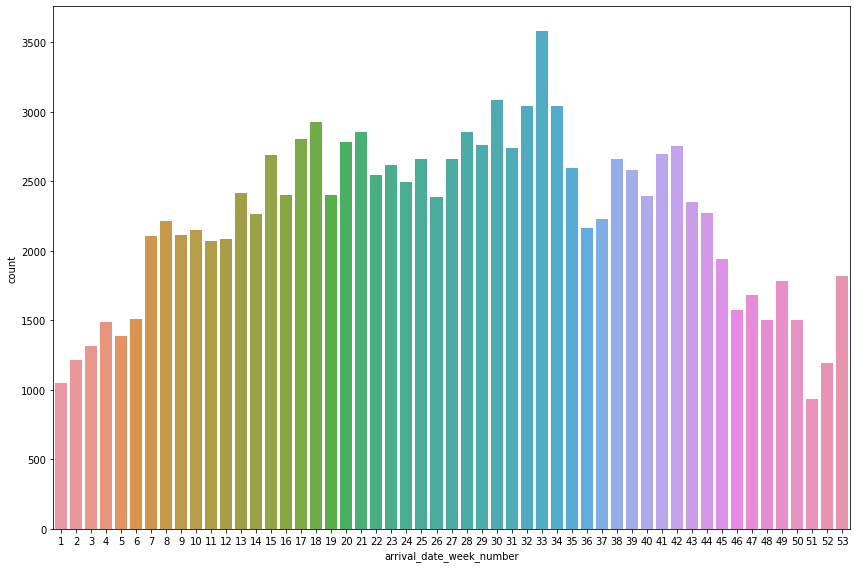

In [14]:
#check the number of booking in each week
plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_week_number',data=df)
plt.tight_layout()

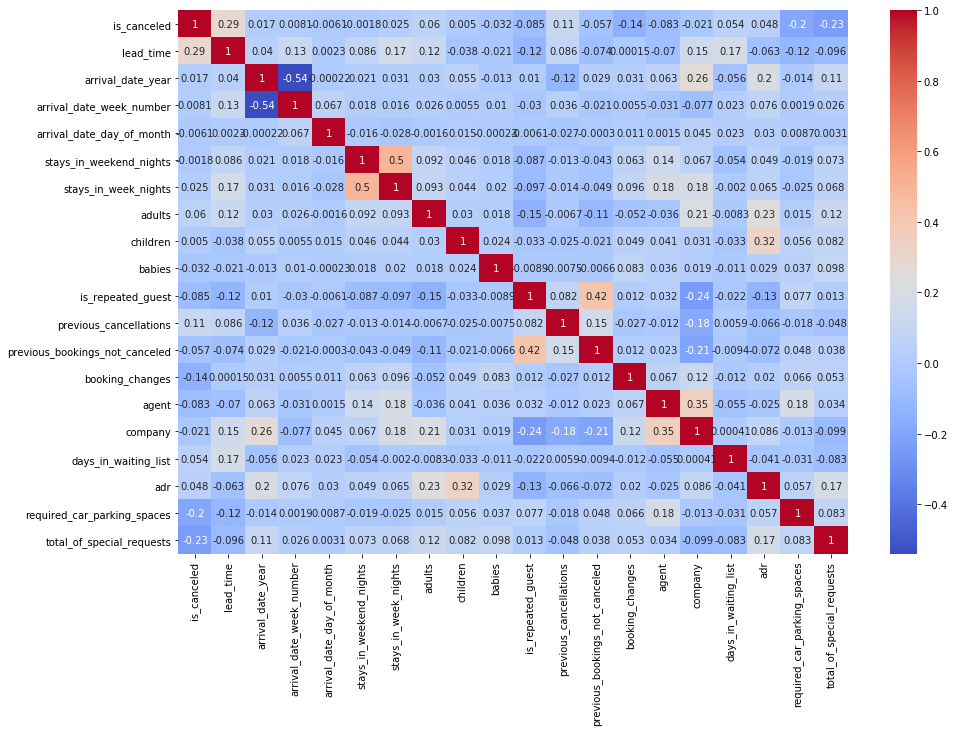

In [31]:
#heatmap correlation
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

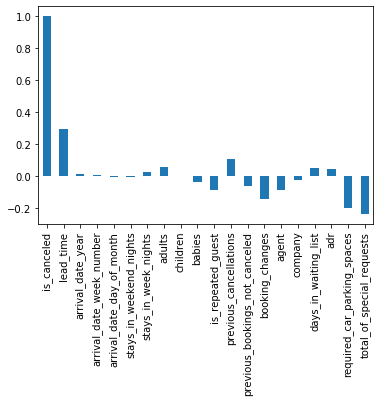

In [34]:
#plot the correlation of is_canceled
df.corr()['is_canceled'].plot(kind='bar')

Text(0.5, 1.0, 'special requests vs negative corr')

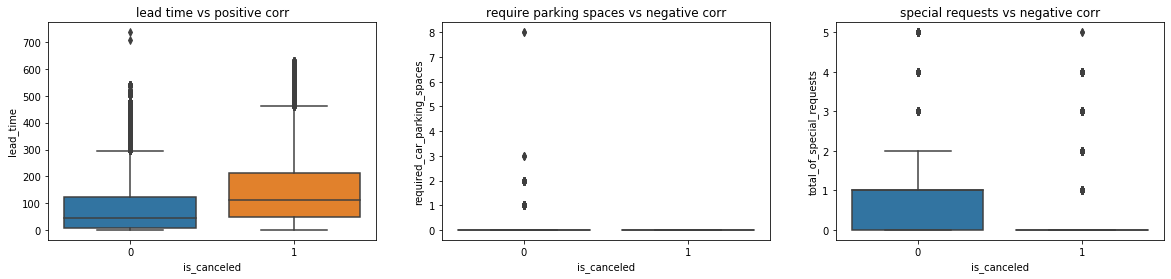

In [47]:
#plot boxplot of variable with somewhat strong correlation with the target

fg,ax = plt.subplots(1,3,figsize=(20,4))
sns.boxplot(x='is_canceled',y='lead_time',data=df,ax=ax[0])
ax[0].set_title('lead time vs positive corr')

sns.boxplot(x='is_canceled',y='required_car_parking_spaces',data=df,ax=ax[1])
ax[1].set_title('require parking spaces vs negative corr')

sns.boxplot(x='is_canceled',y='total_of_special_requests',data=df,ax=ax[2])
ax[2].set_title('special requests vs negative corr')

In [56]:
#check for the number of cancellation vs the number of required parking spaces
print(df.groupby('required_car_parking_spaces')['is_canceled'].value_counts())

#the numbers indicate that all the booking that need parking spaces don't cancel their bookings 
#-> guests that bring cars with them are less likely to cancel

print('-'*20)

#check for the number of cancellation vs the number of special request
print(df.groupby('total_of_special_requests')['is_canceled'].value_counts())

#the numbers shows that the more special requests are the less guests cancel their booking

required_car_parking_spaces  is_canceled
0                            0              67750
                             1              44224
1                            0               7383
2                            0                 28
3                            0                  3
8                            0                  2
Name: is_canceled, dtype: int64
--------------------
total_of_special_requests  is_canceled
0                          0              36762
                           1              33556
1                          0              25908
                           1               7318
2                          0              10103
                           1               2866
3                          0               2051
                           1                446
4                          0                304
                           1                 36
5                          0                 38
                           1           

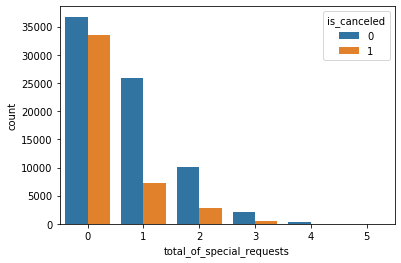

In [59]:
#plot the variable again for visualization
sns.countplot(x='total_of_special_requests',data=df,hue='is_canceled')

In [16]:
#check the percentage
df['market_segment'].value_counts()/len(df['market_segment'])*100

Online TA        47.304632
Offline TA/TO    20.285619
Groups           16.593517
Direct           10.558673
Corporate         4.435045
Complementary     0.622330
Aviation          0.198509
Undefined         0.001675
Name: market_segment, dtype: float64

In [17]:
#check the percentage
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [84]:
#check the percentage
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
#here try to visualization the bookings in each week each year
#select the number of bookings in each week and each year
#2015
tem1=df[df['arrival_date_year']==2015]['arrival_date_week_number'].value_counts()
tem1 = pd.DataFrame(tem1)

#sort the week in order
tem1 =tem1.reset_index()
tem1 =tem1.sort_values('index') 
tem1=tem1.set_index('index')

#2016
tem2=df[df['arrival_date_year']==2016]['arrival_date_week_number'].value_counts()
tem2 = pd.DataFrame(tem2)

tem2 =tem2.reset_index()
tem2 =tem2.sort_values('index')
tem2=tem2.set_index('index')

#2017
tem3=df[df['arrival_date_year']==2017]['arrival_date_week_number'].value_counts()
tem3 = pd.DataFrame(tem3)

tem3 =tem3.reset_index()
tem3 =tem3.sort_values('index')
tem3=tem3.set_index('index')

#insert more row to 2015 and 2017, so that in the figure we have 53 weeks
exam = {'index':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25,26],
    'arrival_date_week_number':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
t = pd.DataFrame(exam)
t=t.set_index('index')

exam1 = {'index':[36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53],
    'arrival_date_week_number':[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]}
t1 = pd.DataFrame(exam1)
t1=t1.set_index('index')

#new data for 2015
temx = pd.concat([tem1,t])

#new data for 2017
temxx = pd.concat([tem3,t1])

#plotting the figure
fig,ax = plt.subplots(3,1,figsize=(12,8))
temx.plot(kind='bar',ax=ax[0])
ax[0].set_xlabel('2015',size=14)
tem2.plot(kind='bar',ax=ax[1])
ax[1].set_xlabel('2016',size=14)
temxx.plot(kind='bar',ax=ax[2])
ax[2].set_xlabel('2017',size=14)
plt.tight_layout()

# Data preprocessing

In [3]:
df = pd.read_csv('hotel_bookings.csv')

In [4]:
#fill NA in the children variable with 0, as most likely no children coming
df['children'].fillna(0,inplace=True)

In [5]:
#make a new variable that combine the number of adults, childrens, babies
df['group_size']=df['adults']+df['children']+df['babies']

#categorize the group into solo (1 person), couple (2 persons), group (>3 people),unknown (0 persons) 
df['group_size']=df['group_size'].replace([ 4.0,  5.0, 26.0, 27.0, 12.0, 10.0, 20.0,
              55.0,  6.0, 50.0, 40.0],3.0)

#for simplicity drop group with 0 person
index =df[df['group_size']==0].index
df.drop(index,inplace=True)

df['group_size'] = df['group_size'].map({2:'Couple',1:'Solo',3:'Group'})

#drop the adults, children, babies
df.drop(['adults','children','babies'],axis=1,inplace=True)

In [6]:
#check the percentage of previous cancellation and not cancel
print('% of previous cancellation')
print(df['previous_cancellations'].value_counts()/119390)
print('--'*20)
print('% of not cancel')
print(df['previous_bookings_not_canceled'].value_counts()/119390)

% of previous cancellation
0     0.944225
1     0.050658
2     0.000955
3     0.000544
24    0.000402
11    0.000293
4     0.000260
26    0.000218
25    0.000209
6     0.000184
19    0.000159
5     0.000159
14    0.000117
13    0.000101
21    0.000008
Name: previous_cancellations, dtype: float64
----------------------------------------
% of not cancel
0     0.968230
1     0.012882
2     0.004858
3     0.002789
4     0.001918
        ...   
47    0.000008
36    0.000008
49    0.000008
50    0.000008
63    0.000008
Name: previous_bookings_not_canceled, Length: 73, dtype: float64


In [7]:
#the majority of the above variable are 0, -> it will not make a great contribute to the predictive model
df.drop(['previous_cancellations','previous_bookings_not_canceled'],axis=1,inplace=True)

In [8]:
#check whether the change in reserved and assigned room type is significant
df.duplicated(subset=['reserved_room_type','assigned_room_type'], keep=False).count()

#there was no changes in room type -> drop 1 of the column
df.drop('assigned_room_type',axis=1,inplace=True)

In [9]:
#arrival_date_week is a more detail variable than arrival_date_month, -> dont need arrival_month
df.drop('arrival_date_month',axis=1,inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

company                        112442
agent                           16280
country                           478
group_size                          0
distribution_channel                0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
meal                                0
market_segment                      0
is_repeated_guest                   0
reservation_status_date             0
reserved_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
hotel                               0
dtype: int64

In [11]:
#check the percentage of the country variable
df['country'].value_counts().head(15)/len(df['country'])*100

#majority of the gusests are from the top 5 country
#will combine everything from the 6th to the rest in one category

rare=df['country'].value_counts()[5:].index.tolist()
df['country']=df['country'].replace(rare,'Oth')

In [12]:
#the null values in the agent are mostly due to that those people dont book via agent, hence
df['agent'].fillna(0,inplace=True)

#change the type of the variable to categorical
df['agent'] = df['agent'].astype('category')

In [13]:
#drop the company variable, due to missing large of the data
df.drop('company',axis=1,inplace=True)

In [14]:
df['booking_changes'].value_counts()

0     101232
1      12666
2       3780
3        914
4        367
5        115
6         61
7         29
8         14
9          8
10         6
13         5
14         3
15         3
17         2
16         2
11         1
12         1
18         1
Name: booking_changes, dtype: int64

In [15]:
#group up booking_changes into 3 groups due to their frequency of changing
df['booking_changes']=df['booking_changes'].replace([3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17, 16, 11, 12, 18],2)

booking_cate={0:'No change',1:'Some changes',2:'Change a lot'}
df['booking_changes']=df['booking_changes'].map(booking_cate)

#change booking_changes to string type
df['booking_changes']=df['booking_changes'].astype('str')

In [16]:
#drop this variable
df.drop('days_in_waiting_list',axis=1,inplace=True)

In [17]:
#group up the no. of requests into 3 groups

df['total_of_special_requests']=df['total_of_special_requests'].replace([3,4,5],2)

df['total_of_special_requests']=df['total_of_special_requests'].map({0:'No request',1:'Some request',2:'a lot of requests'})
df['total_of_special_requests'] = df['total_of_special_requests'].astype('str')

In [18]:
#drop this variable because duplicate with the target
df.drop('reservation_status',axis=1,inplace=True)

#drop this because give no new info
df.drop('reservation_status_date',axis=1,inplace=True)

In [19]:
#group up the minority of the distribution channel to 1 group
df['distribution_channel'] = df['distribution_channel'].replace(['Corporate','GDS','Undefined'],'Others')

#group up the minority categories
df['market_segment'] = df['market_segment'].replace('Undefined','Online TA')

In [20]:
#new variable that indicate how long the guests stay in
df['length'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

#drop the other variables
df.drop(['stays_in_week_nights','stays_in_weekend_nights'],axis=1,inplace=True)

In [21]:
#import library
from scipy import stats

In [22]:
#there are several bookings that have length = 0, now we try to impute the missing length by using the following
#the same booking during the same week and same year is likely to have the same length, hence using mode to find the most
#popular length during that period and use it for the missing data

for week in df[(df['arrival_date_year']==2015) & (df['length']==0)]['arrival_date_week_number']:
    for number in list(range(1,54)):
        if number == week:
            inde=df[(df['length']==0) & (df['arrival_date_year']==2015) & (df['arrival_date_week_number']==number)].index
            mod = df[(df['arrival_date_year']==2015) &(df['arrival_date_week_number']==number)]['length'].mode()[0]
            df.at[inde,'length']=mod

for week in df[(df['arrival_date_year']==2016) & (df['length']==0)]['arrival_date_week_number']:
    for number in list(range(1,54)):
        if number == week:
            inde=df[(df['length']==0) & (df['arrival_date_year']==2016) & (df['arrival_date_week_number']==number)].index
            mod = df[(df['arrival_date_year']==2016) &(df['arrival_date_week_number']==number)]['length'].mode()[0]
            df.at[inde,'length']=mod

for week in df[(df['arrival_date_year']==2017) & (df['length']==0)]['arrival_date_week_number']:
    for number in list(range(1,54)):
        if number == week:
            inde=df[(df['length']==0) & (df['arrival_date_year']==2017) & (df['arrival_date_week_number']==number)].index
            mod = df[(df['arrival_date_year']==2017) &(df['arrival_date_week_number']==number)]['length'].mode()[0]
            df.at[inde,'length']=mod

In [23]:
#get the column object type
df.select_dtypes(['object']).columns

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'total_of_special_requests', 'group_size'],
      dtype='object')

In [24]:
#create the dummies variable
dummies = pd.get_dummies(df[['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'total_of_special_requests', 'group_size']],drop_first=True)
df = df.drop(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'booking_changes', 'deposit_type',
       'customer_type', 'total_of_special_requests', 'group_size'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [25]:
df['is_canceled'].value_counts()#/len(df['is_canceled'])*100

0    75011
1    44199
Name: is_canceled, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop('is_canceled',axis=1)
y = df['is_canceled']

In [27]:
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [28]:
rus = RandomUnderSampler(random_state=101)

In [29]:
X_resampled, y_resampled = rus.fit_resample(X,y)

In [30]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
88393    1
88394    1
88395    1
88396    1
88397    1
Name: is_canceled, Length: 88398, dtype: int64

# Modeling

In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [32]:
model = RandomForestClassifier()

In [33]:
X = df.drop('is_canceled',axis=1)
y = df['is_canceled']

In [34]:
#spliting the original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
pred = model.predict(X_test)

print(classification_report(y_test,pred))
print('-----------')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     22461
           1       0.88      0.81      0.84     13302

    accuracy                           0.89     35763
   macro avg       0.88      0.87      0.88     35763
weighted avg       0.89      0.89      0.89     35763

-----------
[[20945  1516]
 [ 2518 10784]]


In [37]:
#spliting after under sample ()
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [38]:
model.fit(Xr_train,yr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
pred1 = model.predict(X_test)

print(classification_report(y_test,pred1))
print('-----------------')
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     22461
           1       0.89      0.96      0.92     13302

    accuracy                           0.94     35763
   macro avg       0.93      0.94      0.94     35763
weighted avg       0.94      0.94      0.94     35763

-----------------
[[20905  1556]
 [  581 12721]]


In [242]:
kfold = StratifiedKFold(n_splits=5)

DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              #"base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

In [40]:
from sklearn.metrics import roc_curve, auc